In [77]:
from PIL import Image
import matplotlib.pylab as plt
import numpy as np 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import pandas as pd
import json
import arabic_reshaper
from bidi.algorithm import get_display
import hazm
import re
%matplotlib inline

In [14]:
data = pd.read_csv('scrapy_project/jubguy_ir/jubguy_ir/spiders/jobguy_data.csv', encoding='utf-8', header = None)
data = data.drop(0, axis = 1)
data.columns = ['company_name', 'title', 'comment', 'link']
data.head()

,company_name,title,comment,link
0,فرتک,\n سابقه همکاری نسبتا طولانی\n ...,من چندسالی در این شرکت کار میکردم به دلیل یکسر...,https://jobguy.ir/review/131/%D8%B3%D8%A7%D8%A...
1,فرتک,\n استفاده از تکنولوژی های به روز\n...,من در سال 1395 وارد فرتک شدم. یکی از بهترین وی...,https://jobguy.ir/review/132/%D8%A7%D8%B3%D8%A...
2,فرتک,\n من که راضیم\n,قدرت تصمیم گیری فردی در این شرکت خیلی بالاست ب...,https://jobguy.ir/review/430/%D9%85%D9%86-%DA%...
3,فرتک,\n قدرت تصمیم گیری\n,قدرت تصمیم گیری فردی در این شرکت بسیار بالاست....,https://jobguy.ir/review/133/%D9%82%D8%AF%D8%B...
4,ابر آروان,NaN,مصاحبه بنا بود ۵ مرحله داشته باشه که مرحله اول...,https://jobguy.ir/interview/20/%D9%85%D8%B5%D8...


In [76]:
data.shape

(699, 4)

In [51]:
data['title'] = data['title'].map(lambda x:str(x) if type(x)==float else x.splitlines()[1])

In [53]:
stemmer = hazm.Stemmer()

In [54]:
normalizer = hazm.Normalizer()

In [58]:
data.comment = data.comment.map(lambda x: str(x) if type(x)==float else normalizer.normalize(x))

In [61]:
tokenizer= hazm.WordTokenizer()

In [66]:
a = tokenizer.tokenize(data.comment.iloc[220])
a

['اصلا',
 'گول',
 'ظاهر',
 'شرکت',
 'رو',
 'نخورید',
 '.',
 'به',
 'ظاهر',
 'اسم',
 'دانش',
 'بنیان',
 'دارند',
 'کسی',
 'که',
 'تجربه',
 'مصاحبه',
 'با',
 'منابع',
 'انسانی',
 'رو',
 'داره',
 'زود',
 'می\u200cفهمه',
 'که',
 'مدیر',
 'منابع',
 'انسانی',
 'بسیار',
 'عقده\u200cای',
 'بی',
 'تجربه',
 'و',
 'چیپ',
 'هست',
 '…هیچ',
 'کجا',
 'به',
 'جز',
 'این',
 'شرکت',
 'نمی\u200cتونید',
 'ببینید',
 'که',
 'مدیر',
 'منابع',
 'انسانی',
 'مدیران',
 'سطح',
 'بالای',
 'شرکت',
 'رو',
 'روز',
 'مصاحبه',
 'تخریب',
 'کنه',
 'و',
 'ادبیات',
 'در',
 'خور',
 'شان',
 'خودش',
 'رو',
 'داشته',
 'باشه',
 '…',
 '.',
 'فرایند',
 'مدارکی',
 'که',
 'می\u200cخواستند',
 'برای',
 'من',
 'حداقل',
 'دو',
 'روز',
 'طول',
 'می\u200cکشید',
 'که',
 'خدا',
 'رو',
 'شکر',
 'جایه',
 'دیگر',
 'رو',
 'که',
 'کاندید',
 'کرده_بودم',
 'برای',
 'کار',
 '،',
 '،',
 'این',
 'دو',
 'روز',
 'اونجا',
 'صرف',
 'کارهای',
 'مفید',
 'شد',
 '.',
 ',',
 'و',
 'از',
 'لحاظ',
 'تایم',
 'کاری',
 'و',
 'حقوق',
 'برام',
 'بهتر',
 'شد',
 '.']

In [68]:
lemmatizer = hazm.Lemmatizer()

In [70]:
[lemmatizer.lemmatize(x) for x in a]

['اصلا',
 'گول',
 'ظاهر',
 'شرکت',
 'رو',
 'خورد#خور',
 '.',
 'به',
 'ظاهر',
 'اسم',
 'دانش',
 'بنیان',
 'داشت#دار',
 'کس',
 'که',
 'تجربه',
 'مصاحبه',
 'با',
 'منابع',
 'انسان',
 'رو',
 'داره',
 'زود',
 'می\u200cفهمه',
 'که',
 'مدیر',
 'منابع',
 'انسان',
 'بسیار',
 'عقده',
 'بی',
 'تجربه',
 'و',
 'چیپ',
 '#هست',
 '…هیچ',
 'کجا',
 'به',
 'جز',
 'این',
 'شرکت',
 'نمی\u200cتونید',
 'ببینید',
 'که',
 'مدیر',
 'منابع',
 'انسان',
 'مدیر',
 'سطح',
 'بالا',
 'شرکت',
 'رو',
 'روز',
 'مصاحبه',
 'تخریب',
 'کنه',
 'و',
 'ادبیات',
 'در',
 'خور',
 'شان',
 'خودش',
 'رو',
 'داشته',
 'باشه',
 '…',
 '.',
 'فرایند',
 'مدارک',
 'که',
 'خواست#خواه',
 'برای',
 'من',
 'حداقل',
 'دو',
 'روز',
 'طول',
 'کشید#کش',
 'که',
 'خدا',
 'رو',
 'شکر',
 'جایه',
 'دیگر',
 'رو',
 'که',
 'کاندید',
 'کرد#کن',
 'برای',
 'کار',
 '،',
 '،',
 'این',
 'دو',
 'روز',
 'اونجا',
 'صرف',
 'کار',
 'مفید',
 'شد#شو',
 '.',
 ',',
 'و',
 'از',
 'لحاظ',
 'تا',
 'کاشت#کار',
 'و',
 'حقوق',
 'برام',
 'بهتر',
 'شد#شو',
 '.']

In [71]:
text = data.comment.to_string()

In [72]:
text

'0      من چندسالی در این شرکت کار میکردم به دلیل یکسر...\n1      من در سال ۱۳۹۵ وارد فرتک شدم. یکی از بهترین وی...\n2      قدرت تصمیم گیری فردی در این شرکت خیلی بالاست ب...\n3      قدرت تصمیم گیری فردی در این شرکت بسیار بالاست....\n4      مصاحبه بنا بود ۵ مرحله داشته باشه که مرحله اول...\n5      حدود ۱ ماه قبل از عید رزومه از طریق وبسایت رزو...\n6      اینجا رو یکی از دوستانم با یک واسطه بهم معرفی ...\n7      مصاحبه معمولا در ابتدا با یکی از افراد سنیور ش...\n8      کارجویان محترم اصلا من با نظرات و پیشنهادات با...\n9      سوییچ دائمی تسک، نداشتن زمان کاری (پنج شنبه جم...\n10     چند سال از بهترین دوران عمرم رو تو این شرکت بو...\n11     بدترین چیزی که توی اسنپ باکس وجود داره مدیریت ...\n12     سال\u200cهای زیادی در این شرکت کار کردم و تنها چیزی...\n13     من در شرکت امن افزار گستر شریف حدود ۳ سال از م...\n14     در موقع مصاحبه کاری از شما می\u200cخواهند که تعهد ب...\n15     فرهنگ کاری عالی با مدیران فهیم و البته وقتی می...\n16     از هفته\u200cی سوم دیگه فهمیدم اونجا جای من نیست، ت...

In [60]:
token_text = text.split()

In [61]:
token_text = list(set(token_text))

In [62]:
token_text

['115',
 '64',
 '650',
 'ببینید',
 'نزدیک',
 '190',
 '598',
 '358',
 'فرهنگی...',
 'چیپ',
 '587',
 'کار/زندگیشرکت',
 'رفتم.',
 'جالبترین',
 'لاله',
 '26',
 'دلی',
 'شغلم',
 '(...',
 'استیبل',
 'قوی',
 'حیث',
 'نکشیدی',
 '288',
 '220',
 'بچه',
 'ایران',
 '429',
 '517',
 'عنوان...',
 'عالیه',
 'خواد',
 '388',
 '7',
 'بودم',
 '237',
 'بزرگی',
 'چیزی',
 '458',
 'کردم.',
 '166',
 'هستمن',
 'سوادیشون',
 'مجموعه',
 'درک',
 'توصیه...',
 'می\u200cکنند',
 '428',
 'پیشرفت',
 '۲)',
 'متوسط',
 'زبان',
 'زیر',
 'پادگ...',
 'حمایت',
 'آرومی',
 'بع...',
 'استخدام...',
 'ترکیبی',
 'دانشجوی',
 'کسب',
 '174',
 '527',
 '482',
 'کیش',
 'تاشو',
 'خیلییییییییییییییییییی...',
 '184',
 'هیچ',
 '109',
 'كردم',
 'پژوهش',
 'میدن',
 'اولش...',
 'تحریم',
 'اولین',
 'اف...',
 'مذهبی\\n',
 '323',
 'کانال',
 '689',
 'هردو',
 'حیاتی',
 'چا...',
 '75',
 'حما...',
 'تلگرام',
 '۸.۵۵',
 'داش...',
 '62',
 'کتبی',
 'نیست،',
 '28',
 'کنی',
 'هنوز',
 '665',
 '679',
 'اولیه',
 'گرم',
 'خوب',
 'حقوقگاهی',
 'اين',
 '۵',
 'زیرمجمو

In [63]:
token_no_dot = list(map(lambda x: x.replace('.',' '), token_text))

In [64]:
token_no_dot = list(map(lambda x: x.replace(',',' '), token_no_dot))

In [65]:
token_no_dot = list(map(lambda x: x.replace('\\',' '), token_no_dot))

In [66]:
token_no_dot = list(map(lambda x: x.replace('/',' '), token_no_dot))

In [67]:
token_no_dot

['115',
 '64',
 '650',
 'ببینید',
 'نزدیک',
 '190',
 '598',
 '358',
 'فرهنگی   ',
 'چیپ',
 '587',
 'کار زندگیشرکت',
 'رفتم ',
 'جالبترین',
 'لاله',
 '26',
 'دلی',
 'شغلم',
 '(   ',
 'استیبل',
 'قوی',
 'حیث',
 'نکشیدی',
 '288',
 '220',
 'بچه',
 'ایران',
 '429',
 '517',
 'عنوان   ',
 'عالیه',
 'خواد',
 '388',
 '7',
 'بودم',
 '237',
 'بزرگی',
 'چیزی',
 '458',
 'کردم ',
 '166',
 'هستمن',
 'سوادیشون',
 'مجموعه',
 'درک',
 'توصیه   ',
 'می\u200cکنند',
 '428',
 'پیشرفت',
 '۲)',
 'متوسط',
 'زبان',
 'زیر',
 'پادگ   ',
 'حمایت',
 'آرومی',
 'بع   ',
 'استخدام   ',
 'ترکیبی',
 'دانشجوی',
 'کسب',
 '174',
 '527',
 '482',
 'کیش',
 'تاشو',
 'خیلییییییییییییییییییی   ',
 '184',
 'هیچ',
 '109',
 'كردم',
 'پژوهش',
 'میدن',
 'اولش   ',
 'تحریم',
 'اولین',
 'اف   ',
 'مذهبی n',
 '323',
 'کانال',
 '689',
 'هردو',
 'حیاتی',
 'چا   ',
 '75',
 'حما   ',
 'تلگرام',
 '۸ ۵۵',
 'داش   ',
 '62',
 'کتبی',
 'نیست،',
 '28',
 'کنی',
 'هنوز',
 '665',
 '679',
 'اولیه',
 'گرم',
 'خوب',
 'حقوقگاهی',
 'اين',
 '۵',
 'زیرمجموع

In [68]:
temp_text = ' '.join(token_no_dot)
pure_token = temp_text.split()

In [69]:
pure_token

['115',
 '64',
 '650',
 'ببینید',
 'نزدیک',
 '190',
 '598',
 '358',
 'فرهنگی',
 'چیپ',
 '587',
 'کار',
 'زندگیشرکت',
 'رفتم',
 'جالبترین',
 'لاله',
 '26',
 'دلی',
 'شغلم',
 '(',
 'استیبل',
 'قوی',
 'حیث',
 'نکشیدی',
 '288',
 '220',
 'بچه',
 'ایران',
 '429',
 '517',
 'عنوان',
 'عالیه',
 'خواد',
 '388',
 '7',
 'بودم',
 '237',
 'بزرگی',
 'چیزی',
 '458',
 'کردم',
 '166',
 'هستمن',
 'سوادیشون',
 'مجموعه',
 'درک',
 'توصیه',
 'می\u200cکنند',
 '428',
 'پیشرفت',
 '۲)',
 'متوسط',
 'زبان',
 'زیر',
 'پادگ',
 'حمایت',
 'آرومی',
 'بع',
 'استخدام',
 'ترکیبی',
 'دانشجوی',
 'کسب',
 '174',
 '527',
 '482',
 'کیش',
 'تاشو',
 'خیلییییییییییییییییییی',
 '184',
 'هیچ',
 '109',
 'كردم',
 'پژوهش',
 'میدن',
 'اولش',
 'تحریم',
 'اولین',
 'اف',
 'مذهبی',
 'n',
 '323',
 'کانال',
 '689',
 'هردو',
 'حیاتی',
 'چا',
 '75',
 'حما',
 'تلگرام',
 '۸',
 '۵۵',
 'داش',
 '62',
 'کتبی',
 'نیست،',
 '28',
 'کنی',
 'هنوز',
 '665',
 '679',
 'اولیه',
 'گرم',
 'خوب',
 'حقوقگاهی',
 'اين',
 '۵',
 'زیرمجموعه',
 'میشد',
 'روند',
 '558',

In [73]:
persian_stop_words = pd.read_csv('persian_stop_words.txt', header=None)

In [71]:
persian_stop_words=persian_stop_words.values.reshape([-1])

In [72]:
persian_stop_words= list(persian_stop_words)

In [73]:
extra_stop_words = ['من','که','با','شرکت','در', 'این', 'برای', 'بودم', 'داره','توی', 'مرحله', 'بسیار','شرکت','ها' , 'های','علت']

In [74]:
persian_stop_words = persian_stop_words+extra_stop_words

In [75]:
persian_stop_words

['موضوع تحقیق',
 'ارایه گردد',
 'نحوه نمایش',
 'دوباره\u200cای',
 'خواهیمكرد',
 'می توانند',
 'می\u200cتوانند',
 'می فرماید',
 'می\u200cفرماید',
 'وجود دارد',
 'هدف باشیم',
 'بنابراین',
 'برخوردار',
 'نمیمونید',
 'ساخته\u200cام',
 'میخواستن',
 'نمیگیرند',
 'همچنانكه',
 'نمیمونید',
 'میخواهند',
 'می تواند',
 'می باشند',
 'می\u200cتواند',
 'می\u200cباشند',
 'استفاده',
 'میلیارد',
 'جلوگیری',
 'نمیكنند',
 'رابسیار',
 'مینوشند',
 'نمیاورم',
 'رفته\u200cام',
 'اینطوری',
 'شده\u200cاند',
 'می شوند',
 'می کنند',
 'می توان',
 'می باشد',
 'می\u200cشوند',
 'می\u200cکنند',
 'می\u200cتوان',
 'می\u200cباشد',
 'کمک کند',
 'هدف کلی',
 'همچنین',
 'میلیون',
 'درباره',
 'بسیاری',
 'براساس',
 'خواهند',
 'توانند',
 'نخستین',
 'تاكنون',
 'برداری',
 'بهترین',
 'بیشتری',
 'داشتند',
 'نخواهد',
 'دیگران',
 'همچنان',
 'ندارند',
 'روزهای',
 'یكدیگر',
 'همواره',
 'گذاشته',
 'نداشته',
 'خواهیم',
 'بیرونِ',
 'پاعینِ',
 'نزدیكِ',
 'دنبالِ',
 'برابرِ',
 'مانندِ',
 'هنگامِ',
 'عنوانِ',
 'البتّه',
 'وقتیكه',
 'هنگامی',

In [76]:
pure_token = [token for token in pure_token if token not in persian_stop_words]

In [77]:
pure_token

['115',
 '64',
 '650',
 'ببینید',
 'نزدیک',
 '190',
 '598',
 '358',
 'فرهنگی',
 'چیپ',
 '587',
 'کار',
 'زندگیشرکت',
 'رفتم',
 'جالبترین',
 'لاله',
 '26',
 'دلی',
 'شغلم',
 '(',
 'استیبل',
 'قوی',
 'حیث',
 'نکشیدی',
 '288',
 '220',
 'بچه',
 'ایران',
 '429',
 '517',
 'عنوان',
 'عالیه',
 'خواد',
 '388',
 '7',
 '237',
 'بزرگی',
 '458',
 'کردم',
 '166',
 'هستمن',
 'سوادیشون',
 'مجموعه',
 'درک',
 'توصیه',
 '428',
 'پیشرفت',
 '۲)',
 'متوسط',
 'زبان',
 'پادگ',
 'حمایت',
 'آرومی',
 'بع',
 'استخدام',
 'ترکیبی',
 'دانشجوی',
 'کسب',
 '174',
 '527',
 '482',
 'کیش',
 'تاشو',
 'خیلییییییییییییییییییی',
 '184',
 '109',
 'پژوهش',
 'میدن',
 'اولش',
 'تحریم',
 'اولین',
 'اف',
 'مذهبی',
 'n',
 '323',
 'کانال',
 '689',
 'هردو',
 'حیاتی',
 'چا',
 '75',
 'حما',
 'تلگرام',
 '۵۵',
 'داش',
 '62',
 'کتبی',
 'نیست،',
 '28',
 'کنی',
 '665',
 '679',
 'اولیه',
 'گرم',
 'خوب',
 'حقوقگاهی',
 'اين',
 'زیرمجموعه',
 'میشد',
 'روند',
 '558',
 'بهر',
 'تعداد',
 'عزیزفکر',
 'دادسان',
 'اومدم',
 'ساعت',
 'جم',
 'برا',
 'حدي

In [78]:
pure_text = ' '.join(pure_token)

In [82]:
with open('pure.txt','w',encoding='utf-8') as f:
    f.write(pure_text)

In [103]:
with open('pure.txt', 'r', encoding='utf-8') as f:
    new_text = f.read()

In [74]:
persian_text = arabic_reshaper.reshape(text)
persian_text = get_display(persian_text)

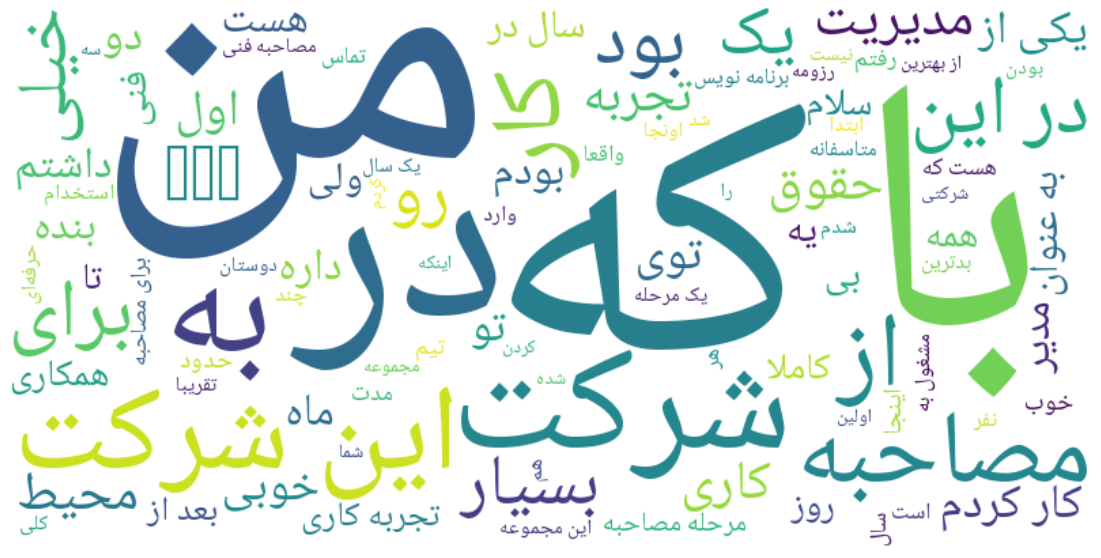

In [75]:
wordcloud = WordCloud(width=800, height=400,background_color='white', max_words=100, font_path='NotoNaskhArabic-Regular.ttf').generate(persian_text)
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('jobguy_ir.png')

In [116]:
a = ['a', 'b', 'c']
a.remove('b')

In [117]:
a

['a', 'c']

In [106]:
from googletrans import Translator

In [107]:
t = Translator()

In [110]:
t.translate('مصاحبه ').text

'interview'

In [112]:
t.translate('interview', dest='persian').text

'مصاحبه'

In [46]:
d = pd.DataFrame(columns=['a', 'b'], index=False)

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [36]:
d

,a,b


In [15]:
d.to_csv('test.csv')

In [37]:
d = d.append({'a':1, 'b':3}, ignore_index=True)

In [38]:
d.append({'a':23,'b':32}, ignore_index=True)

,a,b
0,1,3
1,23,32


In [45]:
d.to_csv('test.csv', mode='a',header=False)

In [41]:
t = pd.DataFrame({'a':1, 'b':3})

ValueError: If using all scalar values, you must pass an index

In [43]:
d = pd.DataFrame.from_dict({'a':[1], 'b':[3]})

In [44]:
d

,a,b
0,1,3


In [50]:
data = pd.read_csv('scrapy_project/jubguy_ir/jubguy_ir/spiders/jobguy_data.csv', encoding='utf-8', header =None)

In [51]:
data.head()

,0,1,2,3,4
0,0,1,کافه بازار,\n محیط کاری فوق العادده\n,\n اولین جایی هست که به طور واضح حرف ...
1,0,2,کافه بازار,\n Software Engineer\n,\n \n\n
2,0,3,کافه بازار,\n تجربه کاری فوق العاده\n,\n تجربه بسیار خوب\n
3,0,4,کافه بازار,\n بستگی داره کجاش باشید\n,\n شرکت خیلی خوبی هست اگر می خوایید ی...
4,0,5,کافه بازار,\n تجربه کار\n,\n محیط پویا \n


In [54]:
data[4].iloc[1]

'\n          \n\n        '

In [56]:
len(list())

0

In [61]:
pd.DataFrame({'a':[1], 'b':[[1,2]]})

,a,b
0,1,"[1, 2]"


In [62]:
'asdf{},fasdf{},adsf{}'.format('1','2','3')

'asdf1,fasdf2,adsf3'

In [65]:
[' '.join([['asfasf'],['fsdfsf'],['sdfsf']])]

TypeError: sequence item 0: expected str instance, list found

In [68]:
len(list([[21],[4234]]))

2

In [87]:
re.findall('\d+','asdf 34 fas fsadf 15')

['34', '15']